In [ ]:
# 📦 Install dependencies
!pip install pandas matplotlib seaborn

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 🎯 Step 1: Define API URL
url = "https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/pedestrian-counting-system-past-hour-counts-per-minute/records?where=location_id%3D84&limit=100"

# 🔗 Step 3: API call
response = requests.get(url)
data = response.json().get("results", [])

# 📊 Step 4: Convert to DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,location_id,sensing_datetime,sensing_date,sensing_time,direction_1,direction_2,total_of_directions
0,84,2025-04-27T14:10:00+00:00,2025-04-28,00:10,12,5,17
1,84,2025-04-27T14:45:00+00:00,2025-04-28,00:45,5,3,8
2,84,2025-04-27T14:50:00+00:00,2025-04-28,00:50,1,1,2
3,84,2025-04-27T15:00:00+00:00,2025-04-28,01:00,3,2,5
4,84,2025-04-27T15:05:00+00:00,2025-04-28,01:05,2,1,3
...,...,...,...,...,...,...,...
95,84,2025-04-27T23:35:00+00:00,2025-04-28,09:35,101,40,141
96,84,2025-04-28T00:25:00+00:00,2025-04-28,10:25,47,56,103
97,84,2025-04-28T00:10:00+00:00,2025-04-28,10:10,56,37,93
98,84,2025-04-28T00:20:00+00:00,2025-04-28,10:20,60,38,98


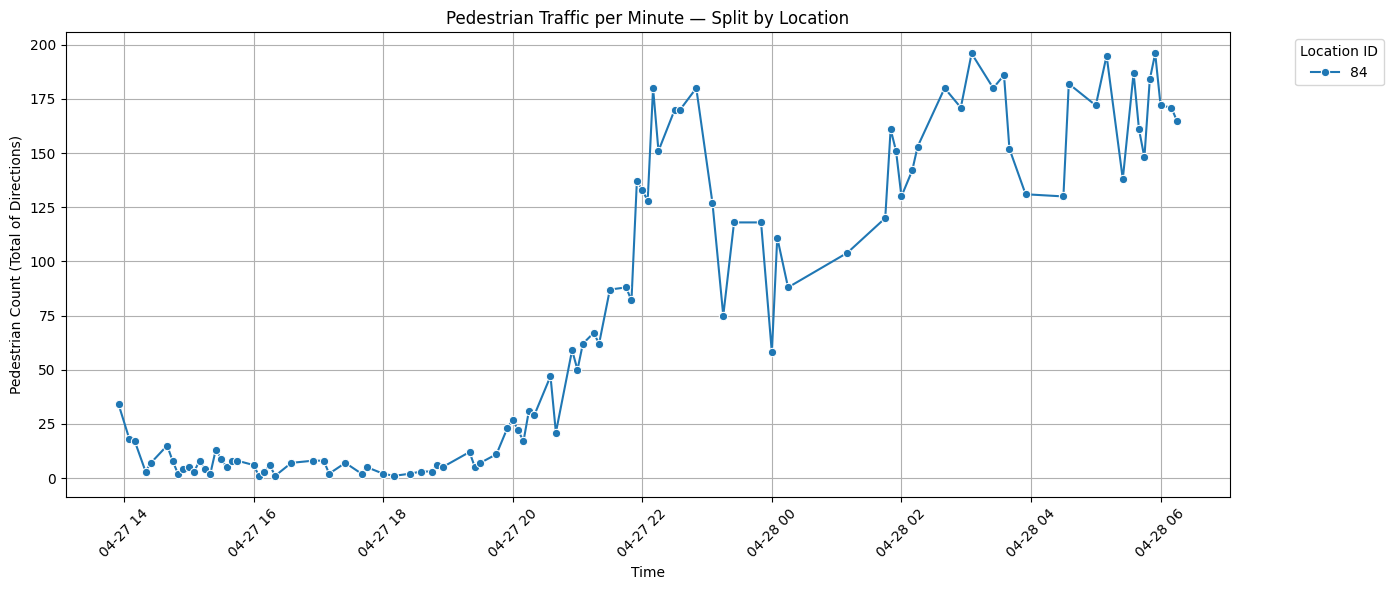

In [ ]:
# Step 4: Cleanup
df["sensing_datetime"] = pd.to_datetime(df["sensing_datetime"])
df["total_of_directions"] = pd.to_numeric(df["total_of_directions"], errors='coerce')
df = df.dropna(subset=["sensing_datetime", "total_of_directions", "location_id"])

# Step 5: create label for location
df["location_label"] = df["location_id"].astype(str)  # or add sensor_name if available

# Step 6: Sort for plotting
df = df.sort_values(by="sensing_datetime")

# Step 7: Plot split by location
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="sensing_datetime", y="total_of_directions", hue="location_label", marker="o")

plt.title("Pedestrian Traffic per Minute — Split by Location")
plt.xlabel("Time")
plt.ylabel("Pedestrian Count (Total of Directions)")
plt.xticks(rotation=45)
plt.legend(title="Location ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()